### Dataset From: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

Fraudulent transactions: 0.17%

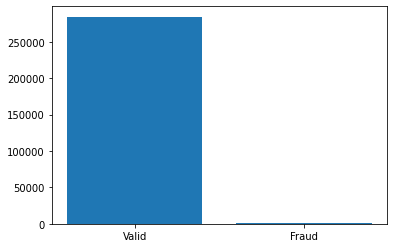

In [2]:
# Exploratory Data Analysis
data = pd.read_csv('creditcard.csv')
plt.bar(['Valid','Fraud'],list(data['Class'].value_counts()))
print("Fraudulent transactions: ", end='')
frauds = data['Class'].value_counts()[1]/sum(data['Class'].value_counts())
print(round(frauds*100,2), end='%')
plt.show()

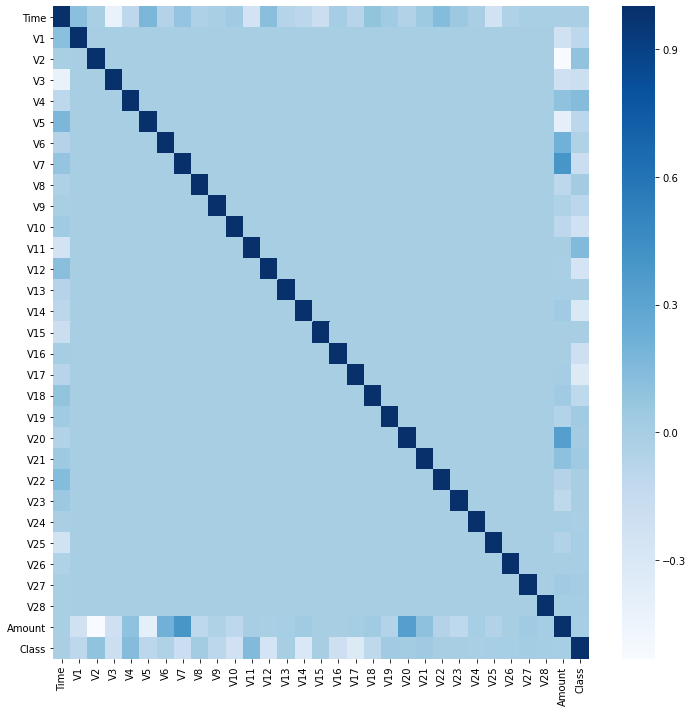

In [3]:
# Correlation Matrix
fig = plt.figure(figsize = (12, 12)) 
sns.heatmap(data.corr(), cmap='Blues')
plt.show()

In [4]:
# Data Pre-Processing
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [6]:
# Classification Model
classifier = RandomForestClassifier() 
classifier.fit(X_train, Y_train) 
Y_pred = classifier.predict(X_test) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [7]:
# Model Evaluation
print("Model Accuracy:", round(accuracy_score(Y_test, Y_pred),4))
print("Model Precision:", round(precision_score(Y_test, Y_pred),4))
print("Model Recall:", round(recall_score(Y_test, Y_pred),4))

Model Accuracy: 0.9996
Model Precision: 0.963
Model Recall: 0.7959


In [ ]:
# Model Evaluation - Confusion Matrix
labels = ['Valid', 'Fraud'] 
conf_matrix = confusion_matrix(Y_test, Y_pred) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, fmt ="d"); 
plt.title("Random Forest Classifier - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show() 